<a href="https://colab.research.google.com/github/JWLBOYCE/AI-image-recognition/blob/main/Pet_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook

In [ ]:
import fastbook
from fastbook import *
fastbook.setup_book()

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.vision.widgets import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()


(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
(path/'annotations').ls()

(#7) [Path('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/xmls'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/README'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt')]

In [ ]:
fns = get_image_files(path)
fns

(#14780) [Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/beagle_186.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/boxer_67.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/Persian_1.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/British_Shorthair_108.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/saint_bernard_1.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/Persian_8.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/english_setter_64.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/British_Shorthair_265.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/pug_7.png'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps/boxer_153.png')...]

In [ ]:
failed = verify_images(fns)

In [ ]:
failed.map(Path.unlink)

(#0) []

In [ ]:
fname = (path/'images').ls()[0]
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_54.jpg')

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['wheaten_terrier']

In [ ]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms = Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [ ]:
dls = pets.dataloaders(path/'images')

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.839255,0.262848,0.911367,02:37


epoch,train_loss,valid_loss,accuracy,time


*   Resnet 18,  0.870 / 0.906
*   Resnet 34,  0.877 / 0.905
*   Resnet 152, 0.916 / 0.915
*   Resnet 152, 0.890 / 0.934(base_lr=3e-4) ******
*   Resnet 152, 0.900 / 0.928(base_lr=3e-4) .to_fp16()
*   Resnet 152, 0.882 / 0.916(base_lr=3e-4) .to_fp32() 

****** This gave the best, so have rerun that and now will attempt to get better using fit_one_cycle and an lr_max slice.






In [ ]:
learn.export()

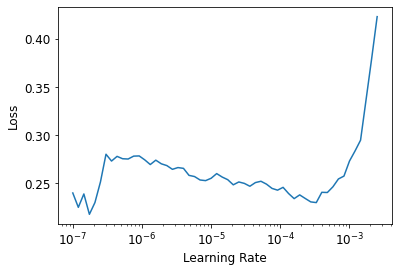

In [ ]:
lr_min, lr_steep = learn.lr_find()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

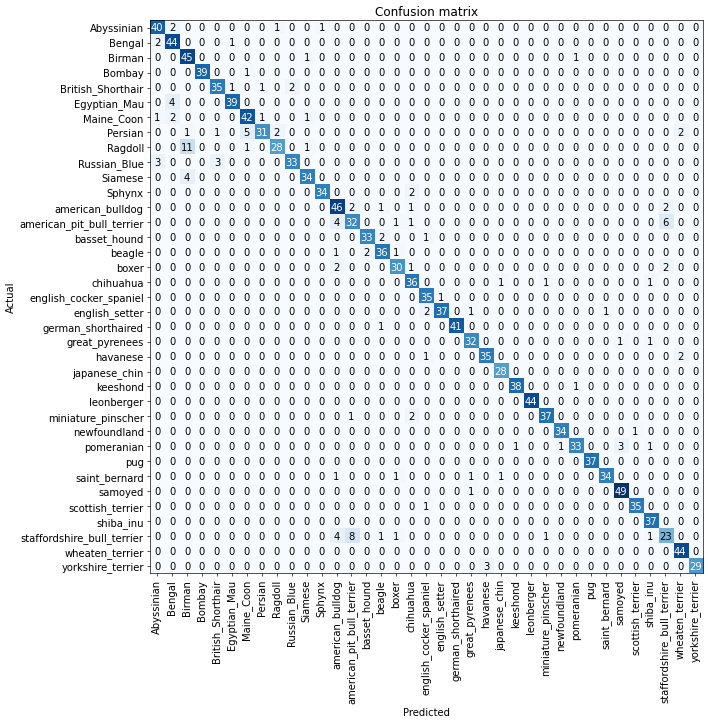

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

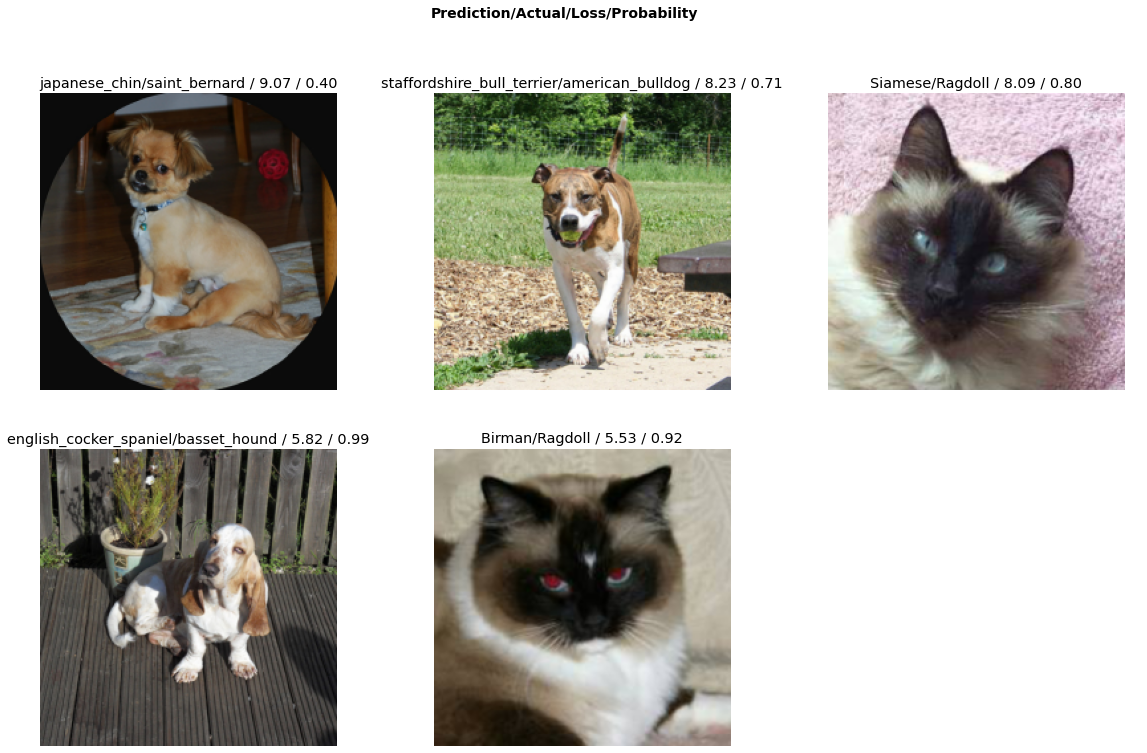

In [ ]:
interp.plot_top_losses(5, figsize=(20,12))

In [ ]:
interp.most_confused(8)

[('Ragdoll', 'Birman', 11),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8)]